In [1]:
import json
import sys
import time
sys.path.append('/home/nbuser/library/')

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset for Assignment.csv')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park


In [3]:
def population(lat, lon):
    url = 'https://koordinates.com/services/query/v1/vector.json'
    params = {
        'key': '4a7d61ba2b634a08a297cd2a9f5d582d',
        'layer': '104612',
        'x': lon,
        'y': lat
    }
    response = requests.get(url, params = params)
    
    pop = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CURPop']
    return pop

In [4]:
df['Population'] = df.apply(lambda x: population(x['Latitude'], x['Longitude']), axis = 1)

In [5]:
depriv_df = pd.read_excel('otago730395.xlsx')

In [6]:
merge_df = pd.merge(df, depriv_df[['SA12018_code', 'NZDep2018']], left_on = 'SA1', right_on = 'SA12018_code')

In [7]:
merge_df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,Population,SA12018_code,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,174,7009770,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,129,7009991,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,7007871,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,231,7008902,9.0


In [8]:
merge_df.isnull().values.any()

True

In [9]:
merge_df.dtypes

Bedrooms          int64
Bathrooms       float64
Address          object
Land area        object
CV                int64
Latitude        float64
Longitude       float64
SA1               int64
0-19 years        int64
20-29 years       int64
30-39 years       int64
40-49 years       int64
50-59 years       int64
60+ years         int64
Suburbs          object
Population        int64
SA12018_code      int64
NZDep2018       float64
dtype: object

In [10]:
merge_df.describe()

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,SA12018_code,NZDep2018
count,1051.000000,1049.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1.051000e+03,1051.000000
mean,3.777355,2.073403,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,179.914367,7.006319e+06,5.063749
std,1.169412,0.992985,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,71.059280,2.591262e+03,2.913471
min,1.000000,1.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.001130e+06,1.000000
25%,3.000000,1.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,7.004416e+06,2.000000
50%,4.000000,2.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,174.000000,7.006325e+06,5.000000
75%,4.000000,3.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,7.008384e+06,8.000000
max,17.000000,8.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,789.000000,7.011028e+06,10.000000


In [11]:
merge_df['Land area'] = merge_df['Land area'].str.extract('(\d+)').astype(float)

In [12]:
merge_df.isnull().sum()
#two missing values in bathrooms and one in suburb
#since our data has over 1000 values, I have decided to drop the three rows with NULL values

Bedrooms        0
Bathrooms       2
Address         0
Land area       0
CV              0
Latitude        0
Longitude       0
SA1             0
0-19 years      0
20-29 years     0
30-39 years     0
40-49 years     0
50-59 years     0
60+ years       0
Suburbs         1
Population      0
SA12018_code    0
NZDep2018       0
dtype: int64

In [13]:
house_df = merge_df.dropna()
final_df = house_df.drop('SA12018_code', axis = 1)

In [14]:
final_df.isnull().sum()

Bedrooms       0
Bathrooms      0
Address        0
Land area      0
CV             0
Latitude       0
Longitude      0
SA1            0
0-19 years     0
20-29 years    0
30-39 years    0
40-49 years    0
50-59 years    0
60+ years      0
Suburbs        0
Population     0
NZDep2018      0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcadc71ee48>,
      dtype=object)

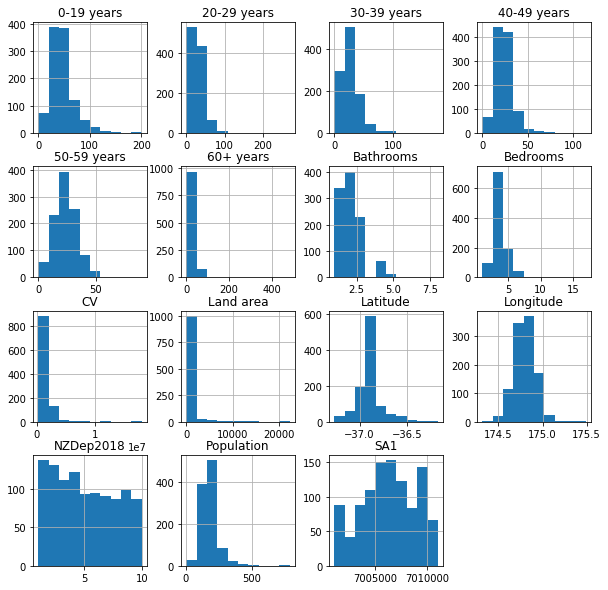

In [15]:
final_df.hist(figsize=(10,10))

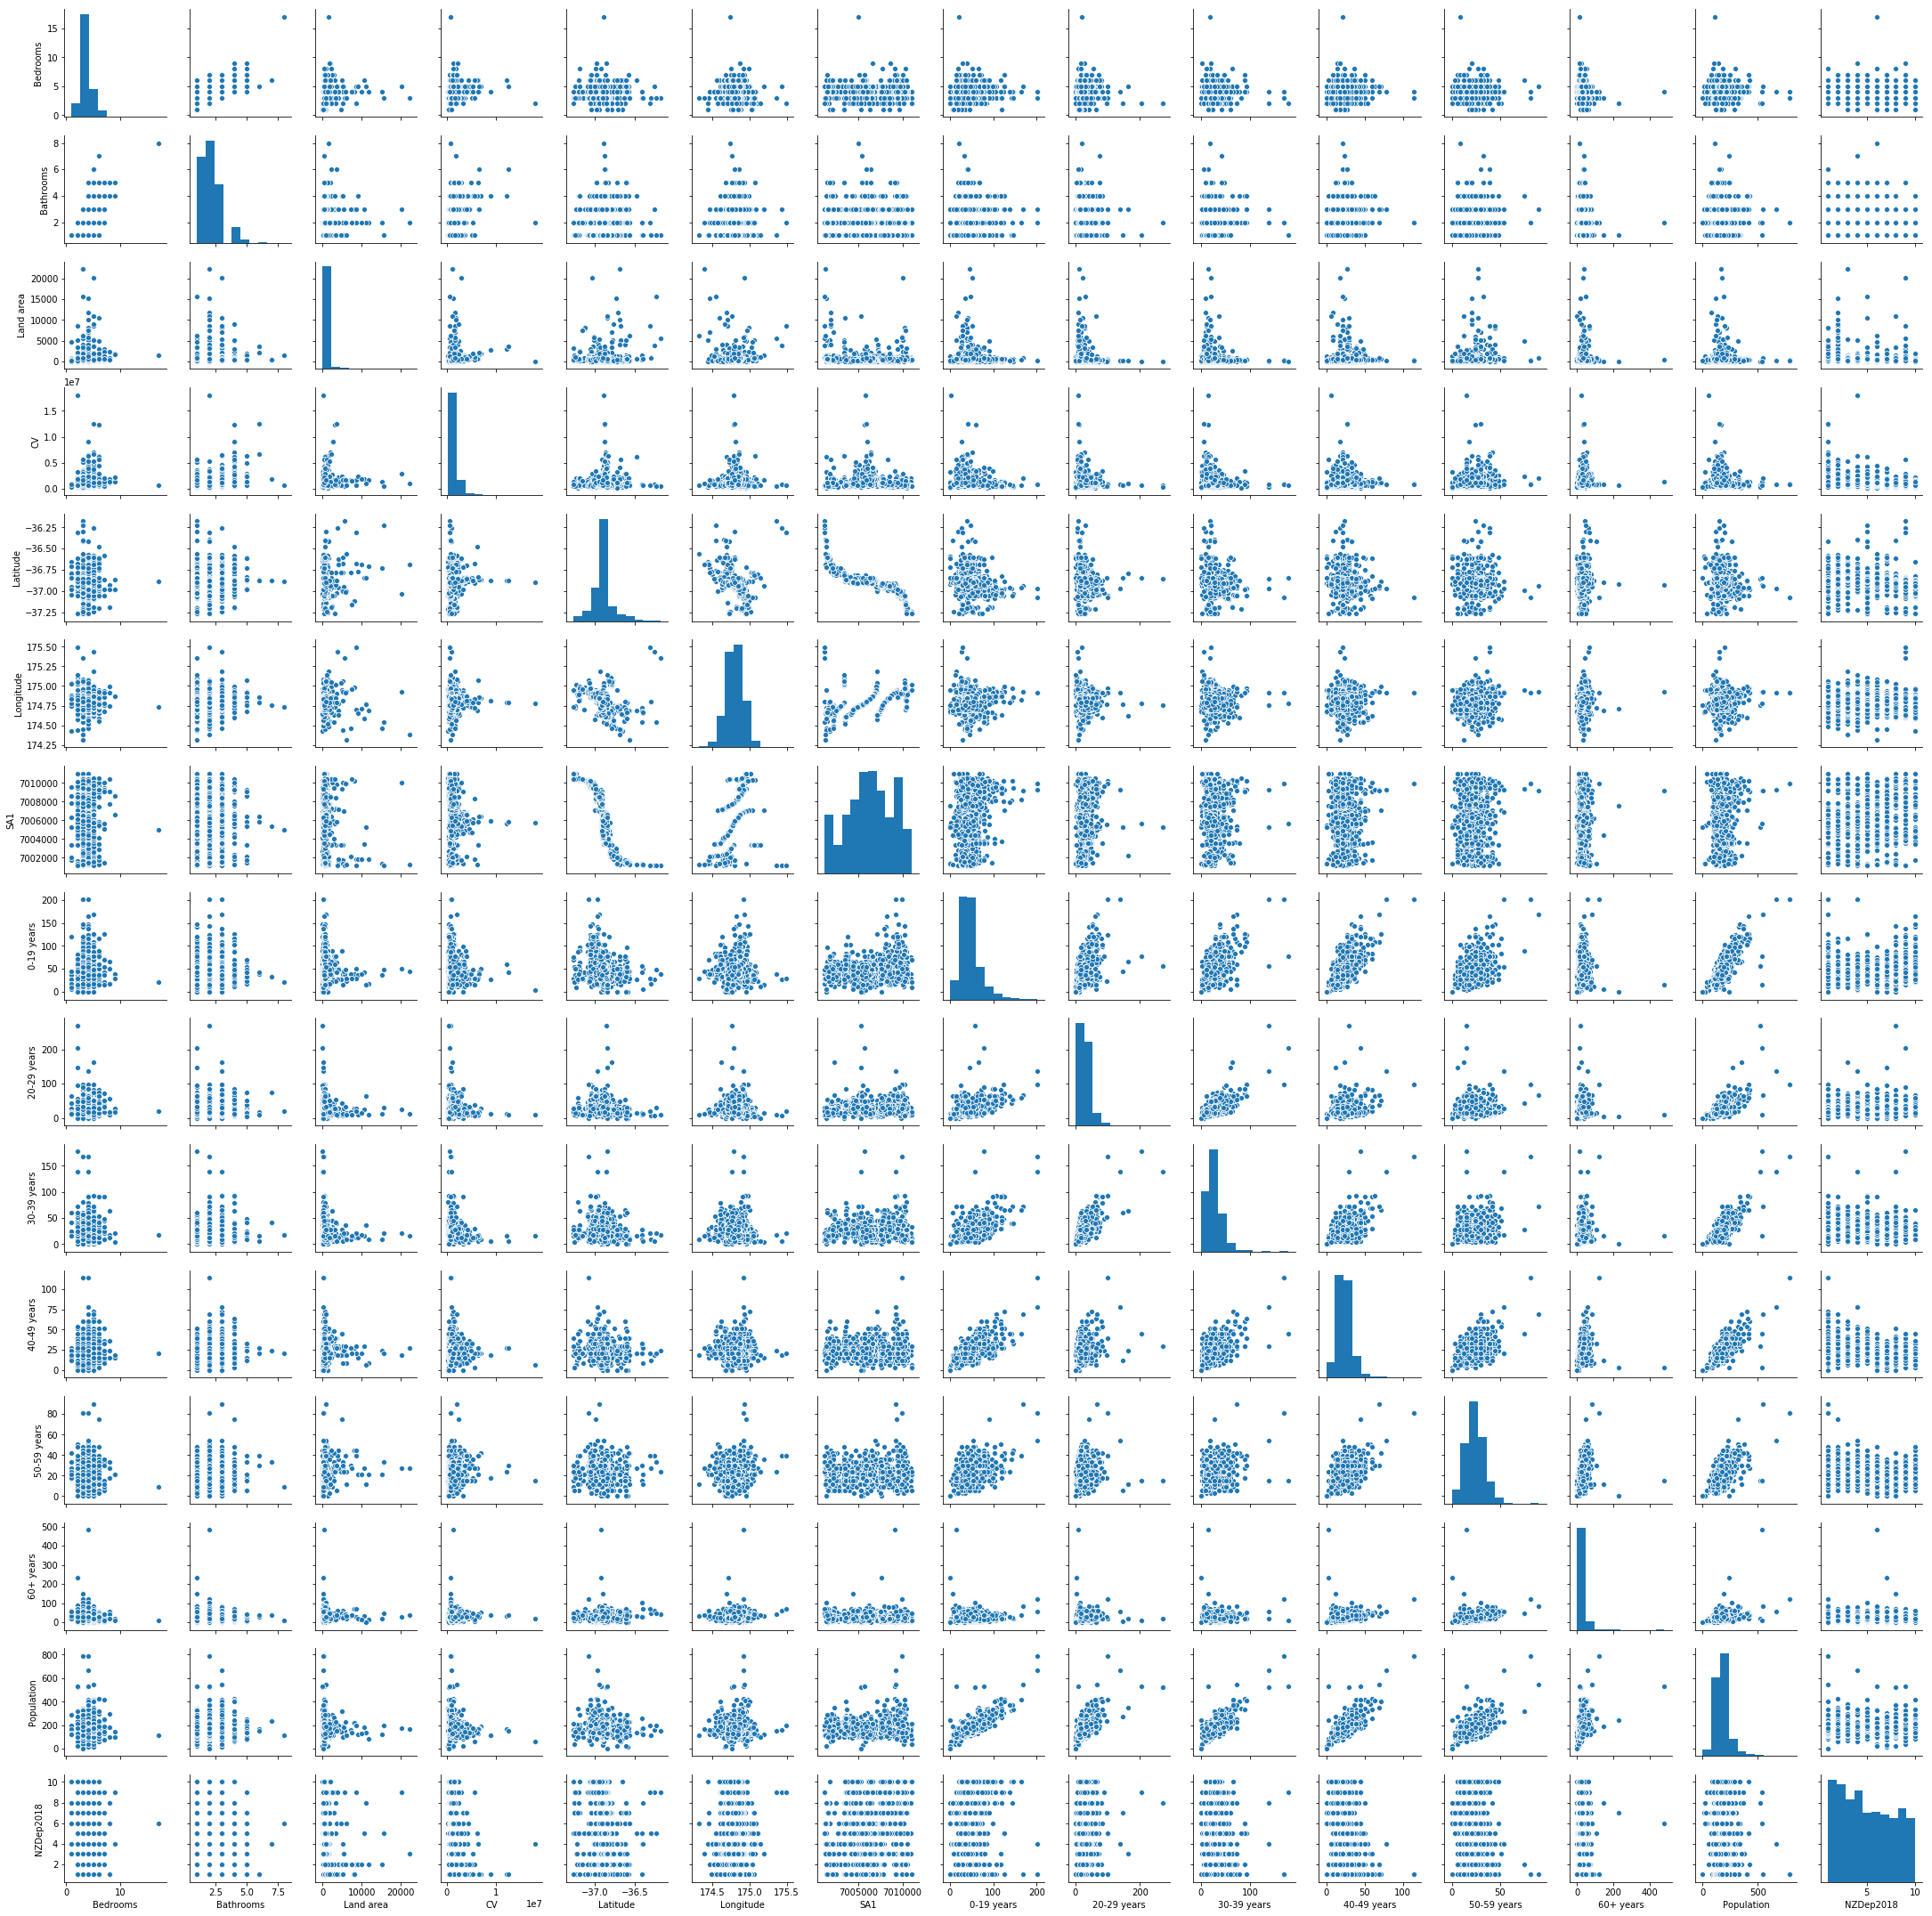

In [16]:
sns.pairplot(final_df, height = 2.0)

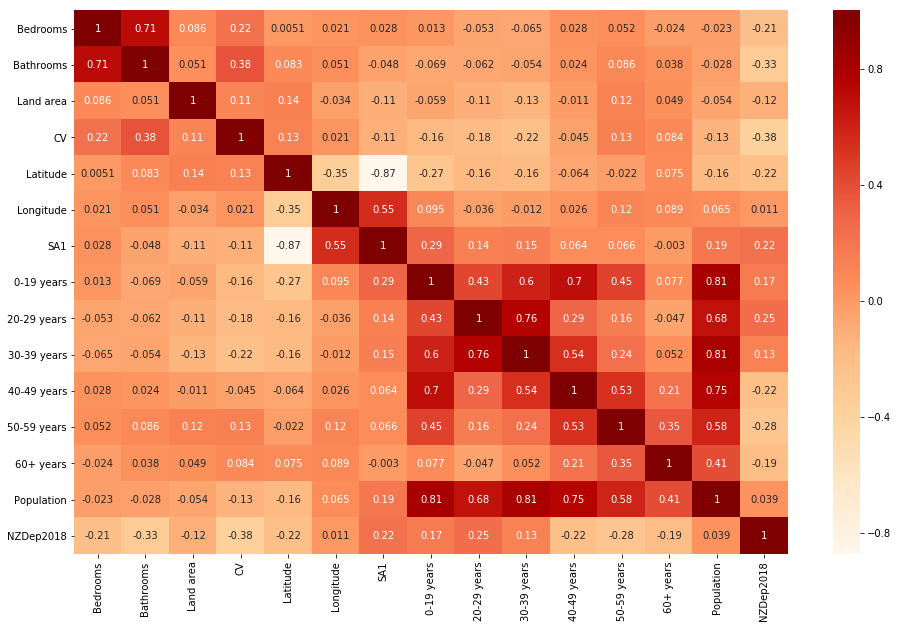

In [17]:
ax, fig = plt.subplots(figsize=(16,10))
correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'OrRd')
plt.show()

In [18]:
#final_df.to_csv ('final_house.csv', header=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


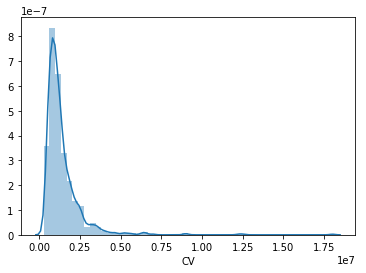

In [19]:
sns.distplot(final_df['CV'])
#skewed CV so we should log(CV) and use median

In [20]:
ml_df = final_df.drop(['Address', 'Suburbs'], axis = 1)

In [21]:
ml_df.dtypes
from sklearn.model_selection import train_test_split

x = ml_df.drop('CV', axis = 1)
x.head()

,Bedrooms,Bathrooms,Land area,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Population,NZDep2018
0,5,3.0,714.0,-37.012920,174.904069,7009770,48,27,24,21,24,21,174,6.0
1,5,3.0,564.0,-37.063672,174.922912,7009991,42,18,12,21,15,30,129,1.0
2,6,4.0,626.0,-37.063580,174.924044,7009991,42,18,12,21,15,30,129,1.0
3,2,1.0,65.0,-36.912996,174.787425,7007871,42,6,21,21,12,15,120,2.0
4,3,1.0,601.0,-36.979037,174.892612,7008902,93,27,33,30,21,33,231,9.0


In [22]:
y = ml_df['CV']
y.head()

0     960000
1    1250000
2    1250000
3     740000
4     630000
Name: CV, dtype: int64

In [23]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 123)

In [24]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [25]:
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
model.coef_

array([-7.21576064e+04,  3.44956863e+05,  2.69175368e+01, -5.43772924e+05,
        4.30167991e+05, -4.27428072e+01,  1.03639684e+04,  1.48685575e+04,
        1.02521409e+03,  4.04812549e+03,  2.61540416e+04,  1.20093709e+04,
       -1.21751393e+04, -9.17454969e+04])

In [27]:
predicted = model.predict(test_x)

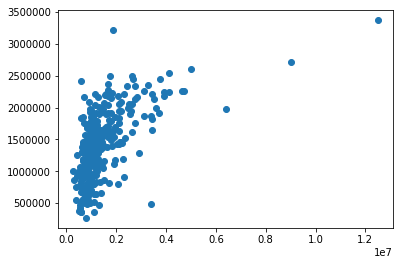

In [28]:
plt.scatter(test_y, predicted)

In [29]:
model.score(test_x, test_y)

0.3235953605437525